<a href="https://colab.research.google.com/github/ApusDT/ApusDT-Neural-Networks-with-KerasRegressor-and-GridSearch/blob/main/Neural_Networks_with_KerasRegressor_and_GridSearcharch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Linear Regression + 1st approach to Grid Search**

### Se crea el entorno primario de trabajo

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


##  IMPORTO IGNORE WARNINGS PERO ME APARECEN IGUAL
import warnings
warnings.filterwarnings('ignore')


###Se importa y visualiza el  dataset

In [ ]:
boston_dataset = load_boston()

df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target

df.head(n=10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### Se exploran los datos

In [ ]:
#Vemos el tamaño
df.shape

(506, 14)

In [ ]:
#Vemos sus principales estadísticos descriptivos
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#Vemos si existen valores nulos. Afortunadamente, no hay.
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

###**Representamos los histogramas con la distribución de dos columnas de datos, usando pyplot:**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ad19dcb90>,
      dtype=object)

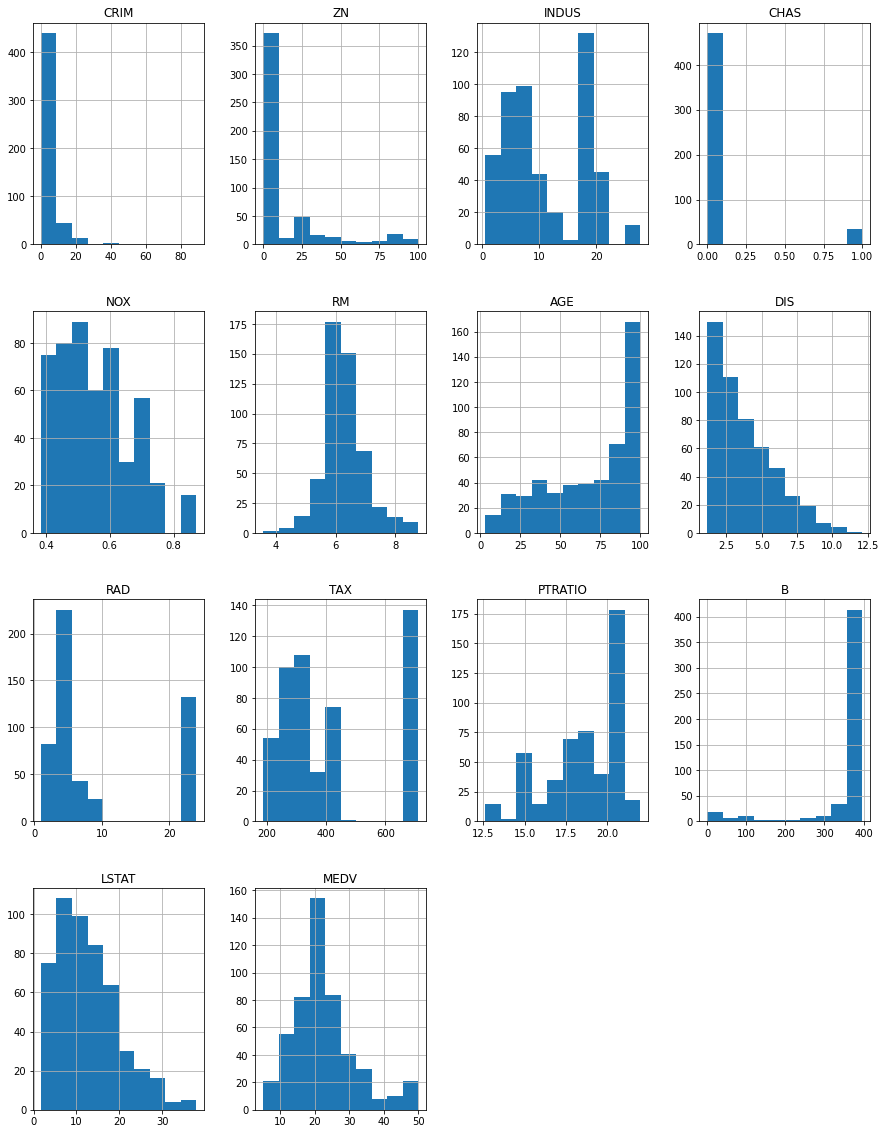

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [ ]:
#Visualizamos las correlaciones 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import numpy as np

total_items = len(df.columns)
items_per_row = 3
total_rows = math.ceil(total_items / items_per_row)

fig = make_subplots(rows=total_rows, cols=items_per_row, subplot_titles=df.columns)

cur_row = 1
cur_col = 1

for index, column in enumerate(df.columns):
    fig.add_trace(go.Scattergl(x=df[column], 
                            y=df['MEDV'], 
                            mode="markers", 
                            marker=dict(size=3)), 
                  row=cur_row, 
                  col=cur_col)
    
    intercept = np.poly1d(np.polyfit(df[column], df['MEDV'], 1))(np.unique(df[column]))
    
    fig.add_trace(go.Scatter(x=np.unique(df[column]), 
                             y=intercept, 
                             line=dict(color='red', width=1)), 
                  row=cur_row, 
                  col=cur_col)
    
    if cur_col % items_per_row == 0:
        cur_col = 1
        cur_row = cur_row + 1
    else:
        cur_col = cur_col + 1
    

fig.update_layout(height=1000, width=550, showlegend=False)
fig.show()

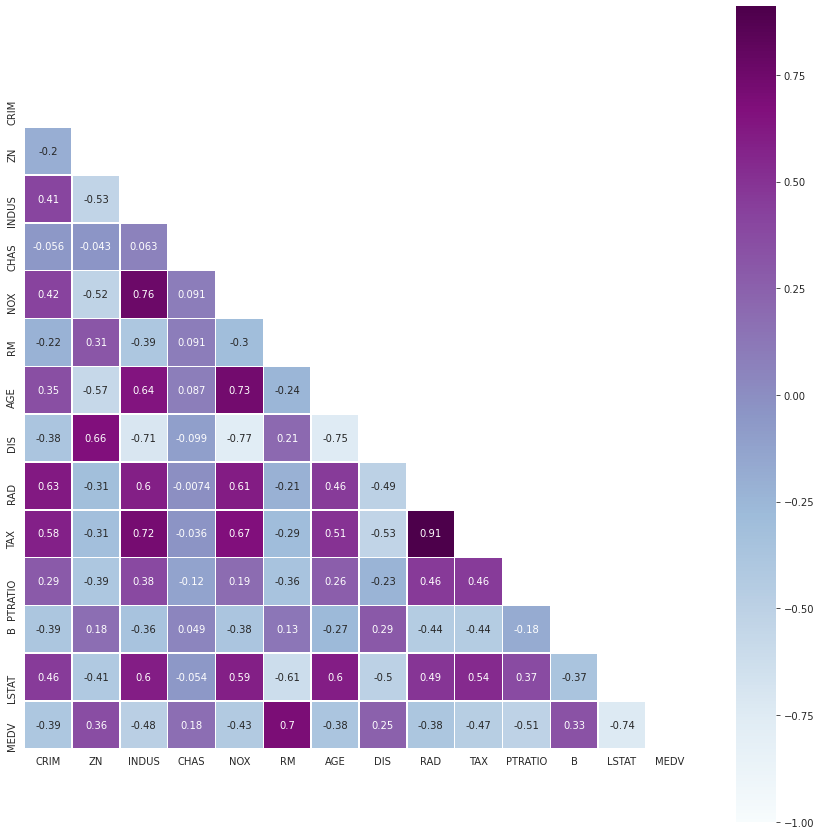

In [ ]:
#Se agrega además, en heatmap para ayudar a la interpretación de los gráficos anteriores
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(df.corr(), mask=mask,annot=True, linewidths=.5, square=True,cmap="BuPu", vmin=-1)

***Se observa que ninguna correlación mostrada por el conjunto de datos, es lo suficientemente cercana a 1 como par que nos sugiera la eliminación de alguna de las variables.***

### Se procede al procesamiento de datos

In [ ]:
#Seleccionamos la columna target
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
#Analizamos los tamaños de del train set y test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


##Se usan 2 tipos de escalado de datos:

a. MinMax

b. StandardScaler

**Y al final, se comparan los resultados.** 



###Se normalizan los datos con MinMaxScaler 


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler((0,1))

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

###Se construye el modelo


In [ ]:
#Se importan librerías
from keras.models import Sequential
from keras.layers import Dense

#Se crea el modelo
model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1')) #Indicamos en la primera capa, que la entrada es un vector
model.add(Dense(64, activation='relu', name='dense_2')) #Segunda capa con 64 neuronas y función de activación relu
model.add(Dense(1, activation='linear', name='dense_output')) #Capa de salida con 1 neurona y función de activación linear

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_output (Dense)         (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


###Entrenamiento del modelo
Haciendo uso del método fit, se ajusta el modelo con las características y sus etiquetas, con 50 epochs; separando el 80% de las muestras para entrenamiento y dejando el 20% restante para validación.

Usamos StandardScaler

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
9/9 [==============================] - 1s 75ms/step - loss: 0.0574 - mae: 0.1723 - val_loss: 0.0272 - val_mae: 0.1252
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0315 - mae: 0.1237 - val_loss: 0.0209 - val_mae: 0.1060
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0222 - mae: 0.1061 - val_loss: 0.0147 - val_mae: 0.0854
Epoch 4/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0160 - mae: 0.0845 - val_loss: 0.0122 - val_mae: 0.0802
Epoch 5/50
9/9 [==============================] - 0s 11ms/step - loss: 0.0141 - mae: 0.0836 - val_loss: 0.0103 - val_mae: 0.0733
Epoch 6/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0114 - mae: 0.0689 - val_loss: 0.0092 - val_mae: 0.0723
Epoch 7/50
9/9 [==============================] - 0s 9ms/step - loss: 0.0097 - mae: 0.0657 - val_loss: 0.0086 - val_mae: 0.0678
Epoch 8/50
9/9 [==============================] - 0s 10ms/step - loss: 0.0081 - mae: 0.0611 - val_los

plotting

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'],
                    name='Entrenamiento'))

fig.add_trace(go.Scattergl(y=history.history['val_loss'],
                    name='Validación'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Error Cuadrático Medio ')

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'], name='Entrenamiento'))
fig.add_trace(go.Scattergl(y=history.history['val_mae'],name='Validación'))

fig.update_layout(height=500, width=700, xaxis_title='Epoch',yaxis_title='Error Medio Absoluto ')

fig.show()

###Se entrena con StandarScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

sc2= StandardScaler((0,1))

X_train2 = sc2.fit_transform(X_train)
X_test2 = sc2.transform(X_test)

y_train2 = sc2.fit_transform(y_train)
y_test2 = sc2.transform(y_test)

In [ ]:
history9 = model.fit(X_train2, y_train2, epochs=50, validation_split=0.2)

Epoch 1/50
9/9 [==============================] - 0s 15ms/step - loss: 0.5167 - mae: 0.5442 - val_loss: 0.2748 - val_mae: 0.3761
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 0.2068 - mae: 0.3343 - val_loss: 0.1743 - val_mae: 0.3219
Epoch 3/50
9/9 [==============================] - 0s 10ms/step - loss: 0.1690 - mae: 0.2998 - val_loss: 0.1287 - val_mae: 0.2639
Epoch 4/50
9/9 [==============================] - 0s 9ms/step - loss: 0.1106 - mae: 0.2228 - val_loss: 0.1244 - val_mae: 0.2517
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0924 - mae: 0.2087 - val_loss: 0.1067 - val_mae: 0.2358
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0837 - mae: 0.2006 - val_loss: 0.0977 - val_mae: 0.2232
Epoch 7/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0785 - mae: 0.1932 - val_loss: 0.1017 - val_mae: 0.2303
Epoch 8/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0728 - mae: 0.1866 - val_loss:

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history9.history['loss'],
                    name='Entrenamiento'))

fig.add_trace(go.Scattergl(y=history9.history['val_loss'],
                    name='Validación'))


fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Error Cuadrático Medio ')

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history9.history['mae'], name='Entrenamiento'))
fig.add_trace(go.Scattergl(y=history9.history['val_mae'],name='Validación'))

fig.update_layout(height=500, width=700, xaxis_title='Epoch',yaxis_title='Error Medio Absoluto ')

fig.show()

##Evaluación del modelo
Para saber si el modelo está aprendiendo bien, se usará la función de pérdida Error Cuadrático Medio (MSE) y para medir su performance usaremos el Error Medio Absoluto (MAE). 

Evaluamos con MinMaxscaler

In [ ]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)


5/5 [==============================] - 0s 2ms/step - loss: 0.6398 - mae: 0.7856
Mean squared error on test data:  0.6397742033004761
Mean absolute error on test data:  0.7855520844459534


Evaluamos con StandardScaler

In [ ]:
mse_nn, mae_nn = model.evaluate(X_test2, y_test2)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 2ms/step - loss: 0.1925 - mae: 0.2587
Mean squared error on test data:  0.19249314069747925
Mean absolute error on test data:  0.2587055265903473


###**Conluimos que el error más bajo se obtiene usando MinMaxSacler**

### Se aplican a los resultados, la función inversa de la normalización, para expresar el error de predicción en unidades reales.
Continuamos usando el escalado MiniMax.

In [ ]:
y_pred = model.predict(X_test)

y_predInverse = sc.inverse_transform(y_pred)
y_testInverse = sc.inverse_transform(y_test)

In [ ]:
combinedArray = np.column_stack((y_testInverse[0:10],y_predInverse[0:10],y_testInverse[0:10]-y_predInverse[0:10] ))
print("Actual  Predicho  Error Real")
s = [[str(e) for e in row] for row in np.around(combinedArray, 3)]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))
print('Las unidades de medida son miles de dólares')

mae_inv=np.reshape(mae_nn, (1,-1))
mse_inv=np.reshape(mse_nn, (1,-1))
mae_inv2= sc.inverse_transform(mae_inv)
mse_inv2= sc.inverse_transform(mse_inv)
print('MAE normalizado:', mae_nn) 
print('MSE en términos reales:', mae_inv )
print('MAE normalizado:', mse_nn)
print('MSE en términos reales:', mse_inv )

Actual  Predicho  Error Real
15.0	-24.199	39.199
26.6	-3.621 	30.221
45.4	0.671  	44.729
20.8	-22.19 	42.99 
34.9	-3.517 	38.417
21.9	-5.944 	27.844
28.7	-6.368 	35.068
7.2 	-32.393	39.593
20.0	-16.073	36.073
32.2	-2.493 	34.693
Las unidades de medida son miles de dólares
MAE normalizado: 0.2587055265903473
MSE en términos reales: [[0.25870553]]
MAE normalizado: 0.19249314069747925
MSE en términos reales: [[0.19249314]]


##Mejoramos el modelo con Grid Search CV


In [ ]:
# Se crea el clasificador con los datos de la red que quiere mejorar

def buildModel(optimizer):
    # inicializador de la red
    classifier = Sequential()
        
    # Capa de entrada de la red 
    classifier.add(Dense(units = 128, input_shape=(13, ), activation = 'relu'))
     
    # Capa oculta de la red 
    classifier.add(Dense(units = 64,  activation = 'relu'))
    
    # Capa de salida de la red
    classifier.add(Dense(units = 1, activation = 'linear'))
    
    #Se compila la red
    classifier.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    
    return classifier

In [ ]:
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

classifier = KerasRegressor(build_fn = buildModel)
# Se añaden los hiperparámetros que se quieren mejorar
parameters = {'batch_size': [16, 32, 64, 128],
              'epochs': [50, 150],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)
grid_search = grid_search.fit(X_train, y_train, verbose = 0)

**Se imprimen por pantalla los mejores valores que encontrados por GridSearchCV.**




In [ ]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))

Best Parameters: {'batch_size': 32, 'epochs': 150, 'optimizer': 'adam'}


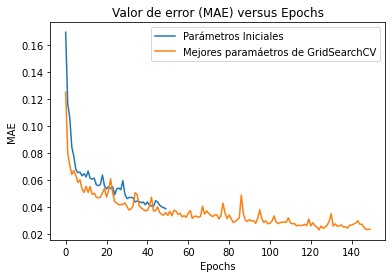

In [ ]:
bestClassifier = buildModel('adam')
HistoryBest = bestClassifier.fit(x = X_train, y = y_train, batch_size = 16, epochs =150 , verbose = 0)
plt.plot(history.history['mae'], label='Parámetros Iniciales ')
plt.plot(HistoryBest.history['mae'], label='Mejores paramáetros de GridSearchCV')
plt.title('Valor de error (MAE) versus Epochs')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error 
print('MAE en el conjunto test: ', mae_nn)
#print("MAE Inicial: " + str( mae_nn(y_test, y_pred, sample_weight=None, multioutput='uniform_average')))
print('Mejor MAE')
print(str(mean_absolute_error(y_test, bestClassifier.predict(X_test), sample_weight=None, multioutput='uniform_average')))

MAE en el conjunto test:  0.2587055265903473
Mejor MAE
0.05758751045585725


**Se imprime una comparativas los 3 tipos de resultados obtenidos en este proyecto: actuales, iniciales, mejores.**

In [ ]:
y_predBestInverse = sc.inverse_transform(bestClassifier.predict(X_test))

combinedArray = np.column_stack((y_testInverse[0:10],y_predInverse[0:10], y_predBestInverse[0:10]))
print("Actual Inicial  Mejor ")
s = [[str(e) for e in row] for row in np.around(combinedArray, 2)]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print ('\n'.join(table))

Actual Inicial  Mejor 
15.0	-24.2 	30.2 
26.6	-3.62 	28.31
45.4	0.67  	43.55
20.8	-22.19	17.75
34.9	-3.52 	27.5 
21.9	-5.94 	45.4 
28.7	-6.37 	24.4 
7.2 	-32.39	10.28
20.0	-16.07	17.27
32.2	-2.49 	30.99


**Se puede observar que los resultados, en efecto, han mejorado.** 


**Concluimos así, que el proceso de usar Redes con Regresión Lineal aplicando GridSearch, es un proceso que vale la pena y mejora visiblemente los resultados.** 